In [37]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("../data/raw/qualidade_ar.csv")

In [39]:
df.head()

,date,pm25,pm10,o3,no2,so2,co
0,2025/5/2,39,19,20,12,,1
1,2025/5/3,44,23,28,15,,2
2,2025/5/4,61,23,27,10,,1
3,2025/5/5,61,41,21,17,,2
4,2025/5/6,53,31,15,24,,5


In [40]:
px.line(df["date"])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4065 non-null   object
 1    pm25   4065 non-null   object
 2    pm10   4065 non-null   object
 3    o3     4065 non-null   object
 4    no2    4065 non-null   object
 5    so2    4065 non-null   object
 6    co     4065 non-null   object
dtypes: object(7)
memory usage: 222.4+ KB


In [42]:
df[" pm25"].isnull().sum()

0

In [43]:
df.rename(columns={" pm25":"pm25"}, inplace=True)

In [44]:
df = df.query("pm25 != ' '")

In [45]:
df.query(" pm25 == 0")

,date,pm25,pm10,o3,no2,so2,co


In [46]:
df["pm25"] = df["pm25"].astype("float")

In [47]:
df["date"] = pd.to_datetime(df["date"])

In [48]:
df = df.sort_values(by="date", ascending=True).reset_index(drop=True)

In [49]:
df

,date,pm25,pm10,o3,no2,so2,co
0,2014-01-02,43.0,,24,12,,4
1,2014-01-03,32.0,,25,15,,5
2,2014-01-04,41.0,,24,9,,4
3,2014-01-05,38.0,,24,7,,3
4,2014-01-06,41.0,,41,12,,4
...,...,...,...,...,...,...,...
2752,2025-05-28,51.0,28,10,10,,1
2753,2025-05-29,30.0,19,9,13,,4
2754,2025-05-30,22.0,36,12,19,,7
2755,2025-05-31,60.0,28,19,15,,1


In [50]:
df = df[["date", "pm25"]]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2757 non-null   datetime64[ns]
 1   pm25    2757 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.2 KB


,ds,y
0,2014-01-02,43.0
1,2014-01-03,32.0
2,2014-01-04,41.0
3,2014-01-05,38.0
4,2014-01-06,41.0
...,...,...
2752,2025-05-28,51.0
2753,2025-05-29,30.0
2754,2025-05-30,22.0
2755,2025-05-31,60.0


In [52]:
df_novo = pd.read_csv("../data/processed/qualidade_ar_processado.csv", parse_dates=["date"])

In [53]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2757 non-null   datetime64[ns]
 1   pm25    2757 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 43.2 KB


In [61]:
df.rename(columns={"date":"ds", "yhat":"y"}, inplace=True)

C:\Users\yasmi\AppData\Local\Temp\ipykernel_21152\3513979193.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
df.isna().sum()

ds    0
y     0
dtype: int64

In [75]:
import joblib
from prophet import Prophet

# 🔥 Carregar o modelo salvo
model = Prophet()
model.fit(df)
# 🔮 Gerar datas futuras para previsão
future = model.make_future_dataframe(periods=365)  # 30 dias, pode mudar

# ⚡ Fazer a previsão
forecast = model.predict(future)

future.tail()

16:46:45 - cmdstanpy - INFO - Chain [1] start processing
16:46:45 - cmdstanpy - INFO - Chain [1] done processing


,ds
3117,2026-05-28
3118,2026-05-29
3119,2026-05-30
3120,2026-05-31
3121,2026-06-01


In [76]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
3117,2026-05-28,52.772296,22.633321,82.063402
3118,2026-05-29,55.139419,26.521606,83.430721
3119,2026-05-30,56.347099,27.587004,84.303315
3120,2026-05-31,54.071825,26.568871,83.330411
3121,2026-06-01,50.909489,23.326171,78.210000


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

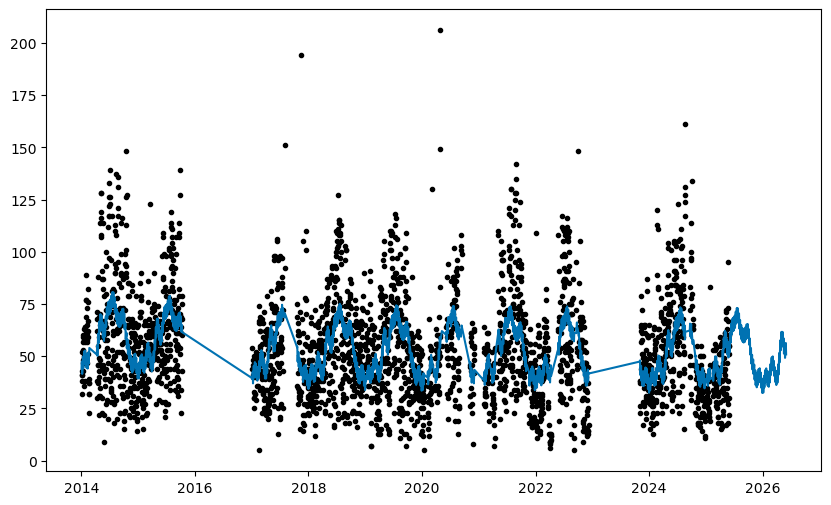

In [78]:
model.plot(forecast)

In [ ]:
forecast = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

In [ ]:
forecast[["yhat", "yhat_lower", "yhat_upper"]] = forecast[["yhat", "yhat_lower", "yhat_upper"]].astype("int")

C:\Users\yasmi\AppData\Local\Temp\ipykernel_21152\56749134.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          2787 non-null   datetime64[ns]
 1   yhat        2787 non-null   int32         
 2   yhat_lower  2787 non-null   int32         
 3   yhat_upper  2787 non-null   int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 54.6 KB


<Axes: >

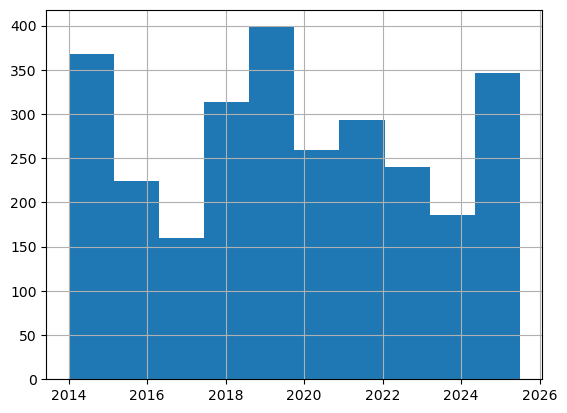

In [ ]:
forecast["ds"].hist()

<Axes: >

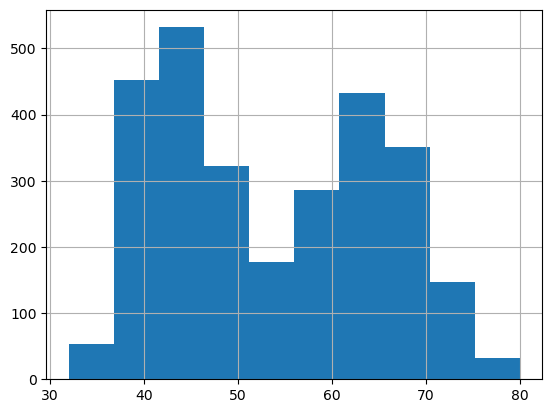

In [ ]:
forecast["yhat"].hist()

<Axes: >

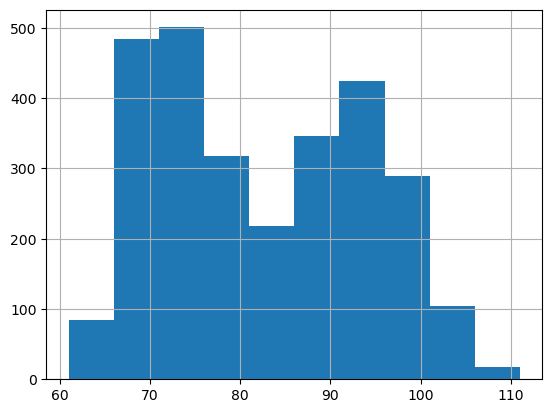

In [ ]:
forecast["yhat_upper"].hist()

In [ ]:
forecast["yhat_upper"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2787 entries, 0 to 2786
Series name: yhat_upper
Non-Null Count  Dtype
--------------  -----
2787 non-null   int32
dtypes: int32(1)
memory usage: 11.0 KB


<Axes: >

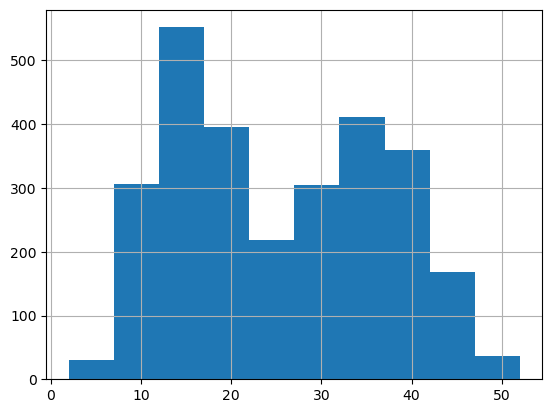

In [ ]:
forecast["yhat_lower"].hist()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

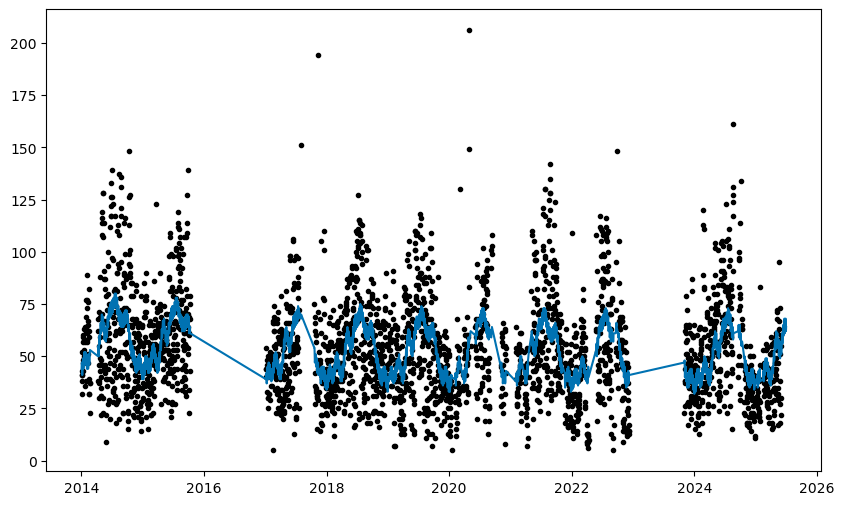

In [ ]:
fig = model.plot(forecast)